# Propagate TLEs

In this notebook, we show how to use $\partial \textrm{SGP4}$ for the propagation of two-line elements (TLE) data

## ⚠️ JAX Version Note

This notebook has been updated for the **JAX implementation** (`dsgp4_jax`).

**Key differences from PyTorch version:**
- Import: `import dsgp4_jax` (instead of `import dsgp4`)
- Tensors: Use `jax.numpy` arrays instead of `torch` tensors
- For automatic differentiation examples, see the [JAX Migration Guide](../../JAX_MIGRATION_GUIDE.md)

The core API remains the same, so most code works as-is!

In [1]:
import dsgp4_jax
import jax.numpy as jnp
%matplotlib inline

## Single TLE propagation

First, we tackle the case in which we have a given TLE, and we would like to propagate it at future time(s).

In [2]:
#we load all TLEs:
tles = dsgp4_jax.tle.load("example.tle")
#we only extract the first one:
my_tle = tles[0]

In [3]:
#we always have to initialize the TLE before we can use it. If that does not, it can be directly initialized during propagation (with a small performance penalty):
dsgp4_jax.initialize_tle(my_tle)

Array([1.18120000e-04, 9.66597277e-12, 0.00000000e+00, 3.75960000e-03,
       5.72310915e+00, 1.29256117e+00, 5.58093463e-01, 6.26505515e-02,
       4.89930327e+00], dtype=float64)

```{note}
In case the TLE has not been initialized, it is also possible to call the propagate method, and let it initialize it. For that, it is enough to pass the boolean flag `initialized` as `False` (otherwise, it defaults as `True`) 
```

In [4]:
#I propagate for 1 day:
tsinces = jnp.linspace(0,24*60,10000)
state_teme=dsgp4_jax.propagate(my_tle,tsinces)

<Axes3D: xlabel='X [km]', ylabel='Y [km]', zlabel='Z [km]'>

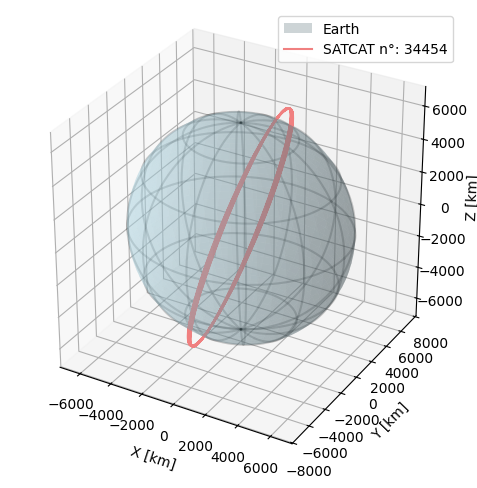

In [ ]:
dsgp4_jax.plot  _orbit(state_teme,
                 color='lightcoral',
                 label=f'SATCAT n°: {my_tle.satellite_catalog_number}')

## Batch TLE propagation

Here, we show how to to propagate batches of TLEs in parallel

In [6]:
#we first need to prepare the data, the API requires that there are as many TLEs as times. Let us assume we want to
#propagate each of the 
tles_=[]
for tle in tles:
    tles_+=[tle]*10000
tsinces = jnp.concatenate([jnp.linspace(0,24*60,10000)]*len(tles))
#first let's initialize them:
_,tle_batch=dsgp4_jax.initialize_tle(tles_)

In [7]:
#we propagate the batch of 3,000 TLEs for 1 day:
states_teme=dsgp4_jax.propagate_batch(tle_batch,tsinces)

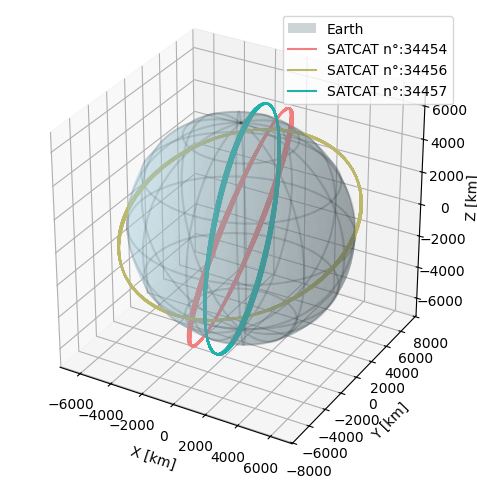

In [8]:
#Let's plot the first orbit:
ax=dsgp4_jax.plot_orbit(states_teme[:10000],
                    color='lightcoral',
                    label=f'SATCAT n°:{tles[0].satellite_catalog_number}')
ax=dsgp4_jax.plot_orbit(states_teme[10000:20000],
                    ax=ax, 
                    color='darkkhaki', 
                    label=f'SATCAT n°:{tles[1].satellite_catalog_number}')
ax=dsgp4_jax.plot_orbit(states_teme[20000:],
                    ax=ax, 
                    color='lightseagreen', 
                    label=f'SATCAT n°:{tles[2].satellite_catalog_number}')